# HDHI Admission Data – Exploratory Data Analysis

This notebook presents a detailed EDA of hospital admissions using the `HDHI Admission data.csv` dataset.

**Objective:** Investigate factors associated with in-hospital mortality (EXPIRY).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import numpy as np

# Load data
file_path = 'data/HDHI Admission data.csv'
adf = pd.read_csv(file_path)
adf.columns = adf.columns.str.strip().str.upper()
adf['OUTCOME_BINARY'] = adf['OUTCOME'].map({'DISCHARGE': 0, 'DAMA': 0, 'EXPIRY': 1})

## 1. Missing Values Overview

In [2]:
missing = adf.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

BNP           8441
EF            1505
GLUCOSE        863
TLC            286
PLATELETS      285
HB             252
CREATININE     247
UREA           241
dtype: int64

## 2. Demographic Summary: Age, Gender, Rural/Urban

In [3]:
adf['AGE'] = pd.to_numeric(adf['AGE'], errors='coerce')
print(adf['AGE'].describe())
print(adf['GENDER'].value_counts())
print(adf['RURAL'].value_counts())

count    15757.000000
mean        61.426160
std         13.420862
min          4.000000
25%         54.000000
50%         62.000000
75%         70.000000
max        110.000000
Name: AGE, dtype: float64
GENDER
M    9990
F    5767
Name: count, dtype: int64
RURAL
U    12077
R     3680
Name: count, dtype: int64


## 3. Outcome Distribution and Mortality Rate

In [4]:
print(adf['OUTCOME'].value_counts())
print('Overall Mortality Rate:', adf['OUTCOME_BINARY'].mean())

OUTCOME
DISCHARGE    13756
EXPIRY        1105
DAMA           896
Name: count, dtype: int64
Overall Mortality Rate: 0.07012756235323983


## 4. Mortality by Age Group

C:\Users\afons\AppData\Local\Temp\ipykernel_8896\2745026287.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_mortality = adf.groupby('AGE_BIN')['OUTCOME_BINARY'].mean()


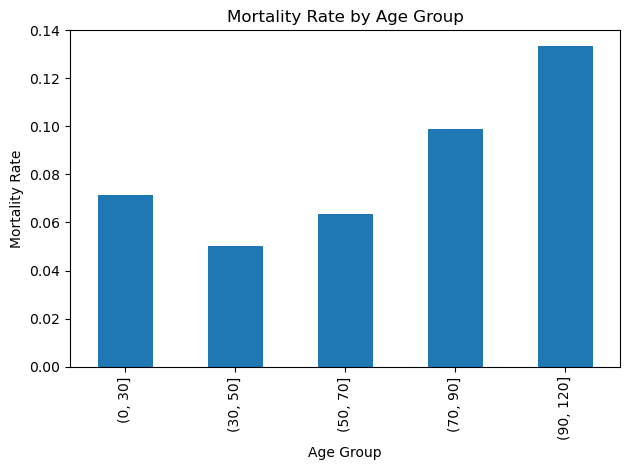

In [5]:
adf['AGE_BIN'] = pd.cut(adf['AGE'], bins=[0,30,50,70,90,120])
age_bin_mortality = adf.groupby('AGE_BIN')['OUTCOME_BINARY'].mean()
age_bin_mortality.plot(kind='bar', title='Mortality Rate by Age Group')
plt.ylabel('Mortality Rate')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

## 5. Gender Distribution and Mortality

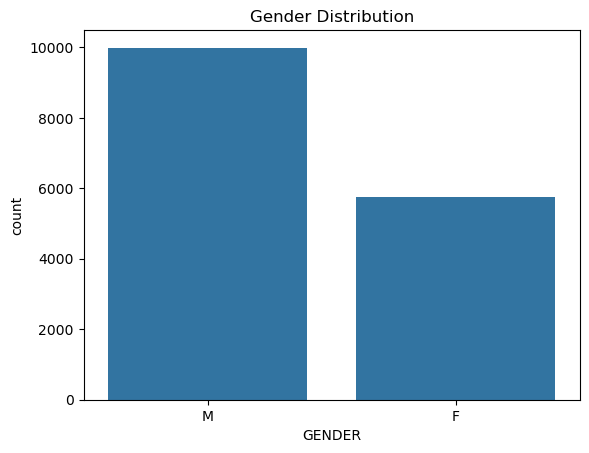

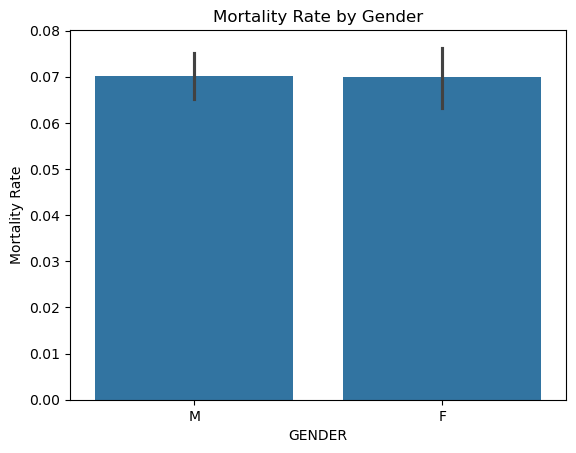

In [6]:
sns.countplot(data=adf, x='GENDER')
plt.title('Gender Distribution')
plt.show()

sns.barplot(x=adf['GENDER'], y=adf['OUTCOME_BINARY'])
plt.title('Mortality Rate by Gender')
plt.ylabel('Mortality Rate')
plt.show()

## 6. Lab Value Correlation with Mortality

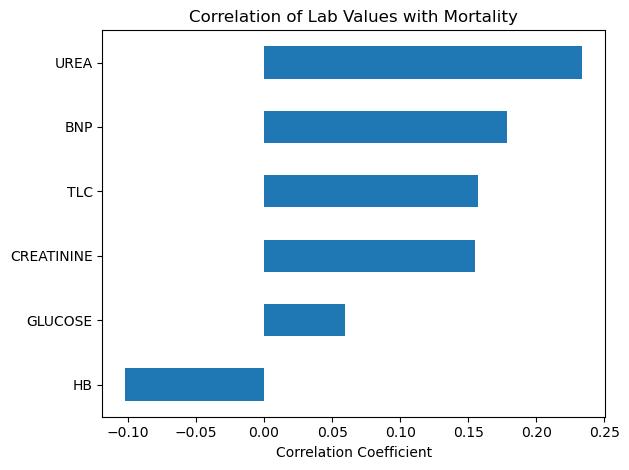

In [7]:
labs = ['HB','TLC','GLUCOSE','UREA','CREATININE','BNP']
adf[labs] = adf[labs].apply(pd.to_numeric, errors='coerce')
lab_corr = adf[labs + ['OUTCOME_BINARY']].corr()['OUTCOME_BINARY'].drop('OUTCOME_BINARY')
lab_corr.sort_values().plot(kind='barh', title='Correlation of Lab Values with Mortality')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

## 7. Comorbidity Analysis

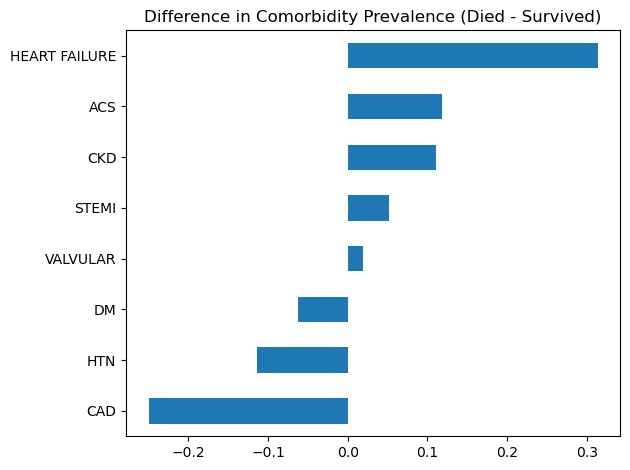

In [8]:
comorbs = ['DM','HTN','CAD','CKD','HEART FAILURE','ACS','STEMI','VALVULAR']
adf[comorbs] = adf[comorbs].apply(pd.to_numeric, errors='coerce').fillna(0)
comorb_stats = adf.groupby('OUTCOME_BINARY')[comorbs].mean().T
comorb_stats.columns = ['Survived (0)', 'Died (1)']
comorb_stats['Diff'] = comorb_stats['Died (1)'] - comorb_stats['Survived (0)']
comorb_stats['Diff'].sort_values().plot(kind='barh', title='Difference in Comorbidity Prevalence (Died - Survived)')
plt.tight_layout()
plt.show()